# **install library**

In [1]:
pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 15.1 MB/s 


In [2]:
pip install GoogleNews

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 292 kB 14.2 MB/s 
     |████████████████████████████████| 749 kB 62.5 MB/s 
  Attempting uninstall: regex
    Found existing installation: regex 2022.6.2
    Uninstalling regex-2022.6.2:
      Successfully uninstalled regex-2022.6.2


In [3]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.8 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


# **read data from yahoo finace**

In [4]:
# import pandas as pd
# data_main=pd.read_csv("data.csv")

In [5]:
import yfinance as yf

data_main = yf.download(tickers='RELIANCE.NS', period = '3000d', interval = '1d')
data_main

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-09-28,499.416046,501.248657,491.837860,494.562042,451.304504,9083473
2010-09-29,495.304993,499.762756,492.828491,494.809692,451.530548,8210100
2010-09-30,496.295624,496.295624,484.457825,488.989868,446.219727,13375049
2010-10-01,491.342560,500.258057,490.351959,499.217926,455.553162,8816508
2010-10-04,502.709808,508.083862,502.709808,504.146210,460.050415,9766747
...,...,...,...,...,...,...
2022-11-11,2600.000000,2636.000000,2588.000000,2631.800049,2631.800049,5681124
2022-11-14,2630.750000,2642.000000,2605.149902,2619.050049,2619.050049,4173395
2022-11-15,2622.300049,2626.399902,2590.000000,2607.300049,2607.300049,3270388


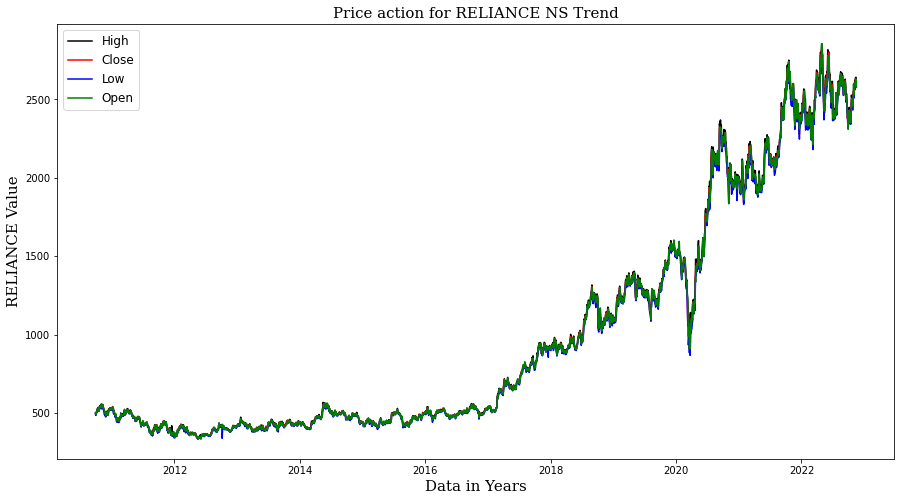

In [6]:
import matplotlib.pyplot as plt
lst_name=["High","Close","Low","Open"]
plt.figure(figsize=(15,8))
plt.plot( data_main[lst_name[0]],"k-")
plt.plot( data_main[lst_name[1]],"r-")
plt.plot( data_main[lst_name[2]],"b-")
plt.plot( data_main[lst_name[3]],"g-")
plt.legend(lst_name,fontsize=12)
plt.title('Price action for RELIANCE NS Trend', fontname='serif', fontsize=15)
plt.xlabel('Data in Years', fontname='serif', fontsize=15)
plt.ylabel('RELIANCE Value', fontname='serif', fontsize=15)
plt.show()

# **get news of GoogleNews**

In [7]:
import time
import urllib
import requests
import bs4
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from GoogleNews import GoogleNews
import datetime
from datetime import timedelta,date
import time
import datetime
from dateutil.relativedelta import relativedelta

def get_past_date(str_days_ago):
    TODAY = datetime.date.today()
    splitted = str_days_ago.split()
    if len(splitted) == 1 and splitted[0].lower() == 'today':
        return str(TODAY.isoformat())
    elif len(splitted) == 1 and splitted[0].lower() == 'yesterday':
        date = TODAY - relativedelta(days=1)
        return str(date.isoformat())
    elif splitted[1].lower() in ['hour', 'hours', 'hr', 'hrs', 'h']:
        date = datetime.datetime.now() - relativedelta(hours=int(splitted[0]))
        return str(date.date().isoformat())
    elif splitted[1].lower() in ['day', 'days', 'd']:
        date = TODAY - relativedelta(days=int(splitted[0]))
        return str(date.isoformat())
    elif splitted[1].lower() in ['wk', 'wks', 'week', 'weeks', 'w']:
        date = TODAY - relativedelta(weeks=int(splitted[0]))
        return str(date.isoformat())
    elif splitted[1].lower() in ['mon', 'mons', 'month', 'months', 'm']:
        date = TODAY - relativedelta(months=int(splitted[0]))
        return str(date.isoformat())
    elif splitted[1].lower() in ['yrs', 'yr', 'years', 'year', 'y']:
        date = TODAY - relativedelta(years=int(splitted[0]))
        return str(date.isoformat())
    else:
        return str_days_ago

In [8]:
from tqdm import tqdm

news_google1=[]
start_date = date(2022, 10, 1)
end_date=date(2022, 10, 28)

day_count=(end_date-start_date).days
max_page_news=2
for data_search in tqdm(start_date + timedelta(n) for n in range(day_count)):
  st= data_search.strftime("%m/%d/%Y")
  googlenews=GoogleNews(start=st,end=st)
  googlenews.search('RELIANCE.NS')
  googlenews.page_at(max_page_news)
  result=googlenews.result()
  #time.sleep(15)
  for j in range(len(result)):
    feild=[]
    tiltle_news=result[j]["title"]
    link_news=result[j]["link"]
    date_news=result[j]["date"]
    feild.append(date_news)
    feild.append(tiltle_news)
    feild.append(link_news)
    news_google1.append(feild)

1it [00:03,  3.21s/it]

'NoneType' object is not iterable


2it [00:03,  1.71s/it]

'NoneType' object is not iterable


8it [00:09,  1.02s/it]

'NoneType' object is not iterable


9it [00:10,  1.07it/s]

'NoneType' object is not iterable


15it [00:18,  1.27s/it]

'NoneType' object is not iterable


16it [00:19,  1.10s/it]

'NoneType' object is not iterable


18it [00:21,  1.00s/it]

'NoneType' object is not iterable


19it [00:21,  1.15it/s]

'NoneType' object is not iterable


20it [00:22,  1.23it/s]

'NoneType' object is not iterable


22it [00:23,  1.41it/s]

'NoneType' object is not iterable


23it [00:24,  1.54it/s]

'NoneType' object is not iterable


24it [00:24,  1.62it/s]

'NoneType' object is not iterable


25it [00:25,  1.61it/s]

'NoneType' object is not iterable


26it [00:26,  1.73it/s]

'NoneType' object is not iterable


27it [00:26,  1.01it/s]

'NoneType' object is not iterable


In [9]:
# convert to dataset
data_news_all=pd.DataFrame(news_google1,columns=["Date","news","link"]) 
# convert string date to date time 
data_news_all["Date"]=data_news_all["Date"].apply(lambda x:get_past_date(x))
# convert to datetime
data_news_all['Date'] = pd.to_datetime(data_news_all['Date'],errors='coerce')
# group by days news
data_news_day=data_news_all.groupby(data_news_all['Date'].dt.date,
                            as_index = True).agg( date=('Date','first'),
                                                   news=('news',' '.join))
data_news_day.drop("date",axis=1,inplace=True)
data_news_day

,news
Date,
2022-10-17,"PM launches 5G services, says it is beginning ..."
2022-10-20,Reliance Jio posts Rs 4518 crore net for Q2 Bi...
2022-10-27,Samvat 2078 to kick in with a big bang Novarti...


In [10]:
data_news_all

,Date,news,link
0,2022-10-17,"PM launches 5G services, says it is beginning ...",https://in.investing.com/news/pm-launches-5g-s...
1,2022-10-17,ASCI to monitor ed-tech dark patterns to preve...,https://www.financialexpress.com/education-2/a...
2,2022-10-17,Trump appointed Florida judge may be removed f...,https://in.investing.com/news/trump-appointed-...
3,2022-10-17,ITC intensifies its 360-degree interventions t...,https://in.investing.com/news/itc-intensifies-...
4,2022-10-17,"Indian ED freezes USDT and WazirX's WRX, here'...",https://in.investing.com/news/indian-ed-freeze...
...,...,...,...
205,2022-10-27,Killam Apartment REIT Provides ESG Update,https://www.newswire.ca/news-releases/killam-a...
206,2022-10-27,Standout Results From Becher Aircore Drilling ...,https://investingnews.com/standout-results-fro...
207,2022-10-27,Osisko Metals Reports Additional Infill Drill ...,https://finance.yahoo.com/news/osisko-metals-r...
208,2022-10-27,Life In Nazi Germany: Food & Drink Used To Con...,https://www.historyextra.com/period/second-wor...


In [11]:
# from tqdm import tqdm

# news_google2=[]
# start_date = date(2022, 8, 15)
# end_date=date(2022, 8, 28)

# day_count=(end_date-start_date).days
# max_page_news=2
# for data_search in tqdm(start_date + timedelta(n) for n in range(day_count)):
#   st= data_search.strftime("%m/%d/%Y")
#   googlenews=GoogleNews(start=st,end=st)
#   googlenews.search('btc bitcoin')
#   googlenews.page_at(max_page_news)
#   result=googlenews.result()
#   #time.sleep(15)
#   for j in range(len(result)):
#     feild=[]
#     tiltle_news=result[j]["title"]
#     link_news=result[j]["link"]
#     date_news=result[j]["date"]
#     feild.append(date_news)
#     feild.append(tiltle_news)
#     feild.append(link_news)
#     news_google2.append(feild)


In [12]:
# # convert to dataset
# data_news_all=pd.DataFrame(news_google2,columns=["Date","news","link"]) 
# # convert string date to date time 
# data_news_all["Date"]=data_news_all["Date"].apply(lambda x:get_past_date(x))
# # convert to datetime
# data_news_all['Date'] = pd.to_datetime(data_news_all['Date'],errors='coerce')
# # group by days news
# data_news_day=data_news_all.groupby(data_news_all['Date'].dt.date,
#                             as_index = True).agg( date=('Date','first'),
#                                                    news=('news',' '.join))
# data_news_day.drop("date",axis=1,inplace=True)
# data_news_day

# **vaderSentiment**

In [13]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
def cal_sentiment(x):
  #print('-')
  score=sia.polarity_scores(x)
  compound=score["compound"]
  neg=score["neg"]
  neu=score["neu"]
  pos=score["pos"]
  out_pd=pd.Series([compound,neg,neu,pos],
            index=['score','neg','neu',"pos"])
  
  return out_pd

data_news_day[['score','neg','neu',"pos"]]=data_news_day["news"].apply(lambda x:cal_sentiment(x))
data_news_sentiment=data_news_day.copy()
data_news_sentiment

,news,score,neg,neu,pos
Date,,,,,
2022-10-17,"PM launches 5G services, says it is beginning ...",0.9992,0.070,0.787,0.143
2022-10-20,Reliance Jio posts Rs 4518 crore net for Q2 Bi...,0.3400,0.040,0.896,0.064
2022-10-27,Samvat 2078 to kick in with a big bang Novarti...,0.9808,0.025,0.830,0.145


In [14]:
data_main["date"]=pd.to_datetime(data_main.index)
data_news_sentiment["date"]=pd.to_datetime(data_news_sentiment.index)
data_main.reset_index(drop = True, inplace = True)
data_news_sentiment.reset_index(drop = True, inplace = True)


In [15]:
data_final=pd.merge(data_main,data_news_sentiment, on="date",how="left")
data_final=data_final.fillna(0)
data_final.replace(np.inf,0,inplace=True)
data_final

,Open,High,Low,Close,Adj Close,Volume,date,news,score,neg,neu,pos
0,499.416046,501.248657,491.837860,494.562042,451.304504,9083473,2010-09-28,0,0.0,0.0,0.0,0.0
1,495.304993,499.762756,492.828491,494.809692,451.530548,8210100,2010-09-29,0,0.0,0.0,0.0,0.0
2,496.295624,496.295624,484.457825,488.989868,446.219727,13375049,2010-09-30,0,0.0,0.0,0.0,0.0
3,491.342560,500.258057,490.351959,499.217926,455.553162,8816508,2010-10-01,0,0.0,0.0,0.0,0.0
4,502.709808,508.083862,502.709808,504.146210,460.050415,9766747,2010-10-04,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2989,2600.000000,2636.000000,2588.000000,2631.800049,2631.800049,5681124,2022-11-11,0,0.0,0.0,0.0,0.0
2990,2630.750000,2642.000000,2605.149902,2619.050049,2619.050049,4173395,2022-11-14,0,0.0,0.0,0.0,0.0
2991,2622.300049,2626.399902,2590.000000,2607.300049,2607.300049,3270388,2022-11-15,0,0.0,0.0,0.0,0.0
2992,2610.000000,2615.949951,2581.350098,2592.350098,2592.350098,4484007,2022-11-16,0,0.0,0.0,0.0,0.0


# **Normalization**

In [16]:
data_ready=data_final[["Close","score"]].copy()
data_ready = data_ready.sort_index(ascending=True, axis=0)
data_ready

,Close,score
0,494.562042,0.0
1,494.809692,0.0
2,488.989868,0.0
3,499.217926,0.0
4,504.146210,0.0
...,...,...
2989,2631.800049,0.0
2990,2619.050049,0.0
2991,2607.300049,0.0
2992,2592.350098,0.0


In [17]:
# pred=lstm_model.predict(x_test)

In [18]:
from sklearn.preprocessing import MinMaxScaler
data_normal=data_ready.copy()
sce=MinMaxScaler(feature_range=(-1,1))
for col_name in (data_ready.columns):
  print(col_name)
  data_col=data_ready[col_name].values.reshape(-1,1)
  data_normal[col_name]=sce.fit_transform(data_col)


Close
score


# **split data and window**

In [19]:
win=60
data_hybrid=data_normal.values
trian_Percentage=0.70
idx=round(data_hybrid.shape[0]*trian_Percentage)
data_train=data_hybrid[0:idx,:]
data_test=data_hybrid[idx-60:,:]

print("_"*50)
print('-> data_train  shape = {0}'.format(data_train.shape))
print('-> data_test   shape = {0}'.format(data_test.shape))
print("_"*50)

__________________________________________________
-> data_train  shape = (2096, 2)
-> data_test   shape = (958, 2)
__________________________________________________


In [20]:
#create window

x_train, y_train = [], []
for i in range(win,data_train.shape[0]):
    x_train.append(data_train[i-win:i,:])
    y_train.append(data_train[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

print("_"*50)
print('-> x_train  shape = {0}'.format(x_train.shape))
print('-> y_train   shape = {0}'.format(y_train.shape))
print("_"*50)

#create window test
x_test, y_test = [], []
for i in range(win,data_test.shape[0]):
    x_test.append(data_test[i-win:i,:])
    y_test.append(data_test[i,0])
x_test, y_test = np.array(x_test), np.array(y_test)

print("_"*50)
print('-> x_test  shape = {0}'.format(x_test.shape))
print('-> y_test   shape = {0}'.format(y_test.shape))
print("_"*50)

__________________________________________________
-> x_train  shape = (2036, 60, 2)
-> y_train   shape = (2036,)
__________________________________________________
__________________________________________________
-> x_test  shape = (898, 60, 2)
-> y_test   shape = (898,)
__________________________________________________


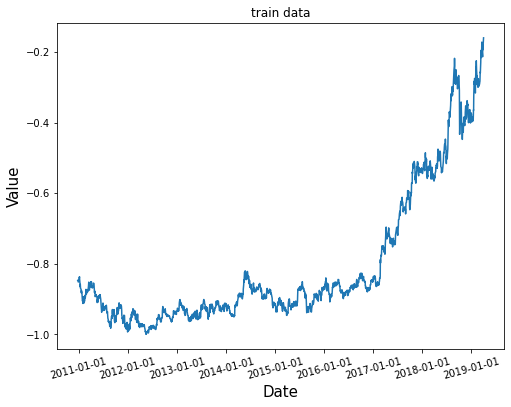

In [21]:
from matplotlib.dates import DateFormatter
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(data_main["date"][win:idx],y_train)
myFmt = DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(myFmt)
plt.setp(ax.get_xticklabels(), rotation = 15)
plt.title("train data")
plt.xlabel('Date', fontsize=15)
plt.ylabel('Value', fontsize=15)
plt.show()

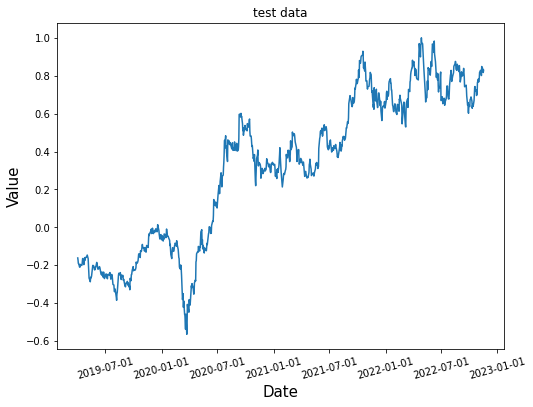

In [22]:
from matplotlib.dates import DateFormatter
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(data_main["date"][idx:],y_test)
myFmt = DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(myFmt)
plt.setp(ax.get_xticklabels(), rotation = 15)
plt.title("test data")
plt.xlabel('Date', fontsize=15)
plt.ylabel('Value', fontsize=15)
plt.show()

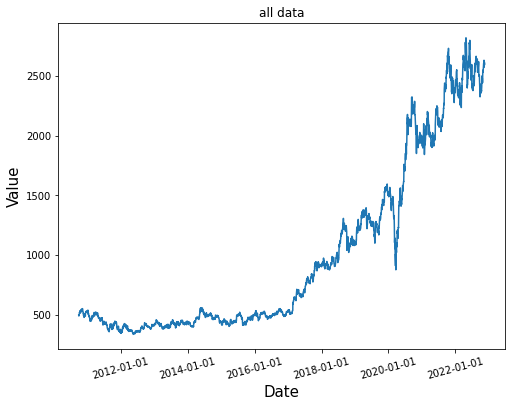

In [23]:
from matplotlib.dates import DateFormatter
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(data_main["date"],data_ready["Close"])
myFmt = DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(myFmt)
plt.setp(ax.get_xticklabels(), rotation = 15)
plt.title("all data")
plt.xlabel('Date', fontsize=15)
plt.ylabel('Value', fontsize=15)
plt.show()

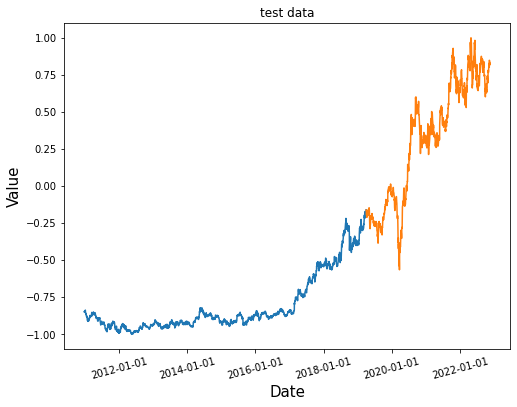

In [24]:
from matplotlib.dates import DateFormatter
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(data_main["date"][win:idx],y_train)
ax.plot(data_main["date"][idx:],y_test)
myFmt = DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(myFmt)
plt.setp(ax.get_xticklabels(), rotation = 15)
plt.title("test data")
plt.xlabel('Date', fontsize=15)
plt.ylabel('Value', fontsize=15)
plt.show()

# **LSTM**

In [25]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
from tensorflow import keras


#initialisizng the model 
lstm_model= Sequential()
lstm_model.add(LSTM(units=250,return_sequences=True,
                    input_shape=(x_train.shape[1],x_train.shape[2])))
lstm_model.add(LSTM(units=250))
lstm_model.add(Dropout(0.25)) #avoid overfitting in LSTM
lstm_model.add(Dense(units=1))

#----- compile model
opt = keras.optimizers.Adam(learning_rate=0.0001)
lstm_model.compile(optimizer='adam',loss='mean_squared_error')
lstm_model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 250)           253000    
                                                                 
 lstm_1 (LSTM)               (None, 250)               501000    
                                                                 
 dropout (Dropout)           (None, 250)               0         
                                                                 
 dense (Dense)               (None, 1)                 251       
                                                                 
Total params: 754,251
Trainable params: 754,251
Non-trainable params: 0
_________________________________________________________________


In [26]:
hist_lstm_model=lstm_model.fit(x_train,y_train,epochs=100,
                        validation_data=(x_test,y_test)
                        ,batch_size=256)

Epoch 1/100
8/8 [==============================] - 8s 161ms/step - loss: 0.1031 - val_loss: 0.3561
Epoch 2/100
8/8 [==============================] - 0s 38ms/step - loss: 0.0195 - val_loss: 0.1280
Epoch 3/100
8/8 [==============================] - 0s 63ms/step - loss: 0.0094 - val_loss: 0.0159
Epoch 4/100
8/8 [==============================] - 0s 46ms/step - loss: 0.0050 - val_loss: 0.0372
Epoch 5/100
8/8 [==============================] - 0s 39ms/step - loss: 0.0031 - val_loss: 0.0339
Epoch 6/100
8/8 [==============================] - 1s 72ms/step - loss: 0.0024 - val_loss: 0.0123
Epoch 7/100
8/8 [==============================] - 0s 39ms/step - loss: 0.0023 - val_loss: 0.0171
Epoch 8/100
8/8 [==============================] - 0s 37ms/step - loss: 0.0021 - val_loss: 0.0266
Epoch 9/100
8/8 [==============================] - 0s 36ms/step - loss: 0.0019 - val_loss: 0.0237
Epoch 10/100
8/8 [==============================] - 0s 36ms/step - loss: 0.0018 - val_loss: 0.0159
Epoch 11/100
8/8 [

In [27]:
result_array=[]
algorithm_name=[]

In [28]:
from sklearn import metrics
import math

y_pred=lstm_model.predict(x_test)
lbl_real=y_test

mse=metrics.mean_squared_error(lbl_real, y_pred)
rmse = math.sqrt(mse)
mape=metrics.mean_absolute_percentage_error(lbl_real, y_pred)
mae=metrics.mean_absolute_error(lbl_real,y_pred)
r2= metrics.r2_score(lbl_real, y_pred)

# acc error
err = abs(y_test- y_pred)
diff = sum(err) / len(err)
accr = 100 - np.mean(diff)

result_array.append([mse,rmse,mape,mae,r2,accr])
algorithm_name.append("LSTM")


29/29 [==============================] - 1s 5ms/step


In [29]:
from sklearn.preprocessing import MinMaxScaler
data_normal=data_ready.copy()
sce=MinMaxScaler(feature_range=(-1,1))
data_col=data_ready["Close"].values.reshape(-1,1)
sce.fit(data_col)
y_train_real  = sce.transform(y_train.reshape(-1,1))
y_test_real  = sce.transform(y_test.reshape(-1,1))
pred_real=sce.transform(y_pred.reshape(-1,1))

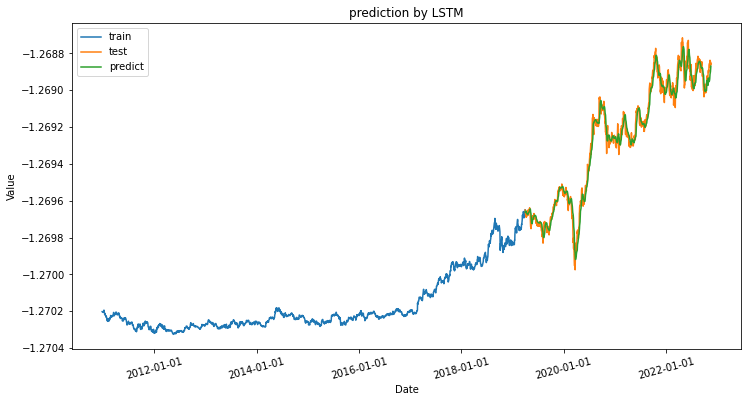

In [30]:
from matplotlib.dates import DateFormatter
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(data_main["date"][win:idx],y_train_real)
ax.plot(data_main["date"][idx:],y_test_real)
ax.plot(data_main["date"][idx:],pred_real)
myFmt = DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(myFmt)
plt.setp(ax.get_xticklabels(), rotation = 15)
plt.legend(["train","test","predict"])
plt.title("prediction by LSTM")
plt.xlabel('Date', fontsize=10)
plt.ylabel('Value', fontsize=10)
plt.show()

# **CNN**

In [31]:
x_train.shape

(2036, 60, 2)

In [32]:
from keras.models import Sequential
from keras.layers import Conv2D,AveragePooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
from tensorflow import keras


#initialisizng the model 
cnn_model= Sequential()
cnn_model.add(Conv2D(filters=128,kernel_size=(2,2),strides=(2,1), padding="same",
                      input_shape=(x_train.shape[1],x_train.shape[2],1)))
cnn_model.add(Conv2D(filters=256,kernel_size=(2,2),strides=(2,1),padding="same"))
cnn_model.add(AveragePooling2D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dropout(0.01)) 
cnn_model.add(Dense(units=1))

#----- compile model
opt = keras.optimizers.Adam(learning_rate=0.0001)
cnn_model.compile(optimizer='adam',loss='mean_squared_error')
cnn_model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 2, 128)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 15, 2, 256)        131328    
                                                                 
 average_pooling2d (AverageP  (None, 7, 1, 256)        0         
 ooling2D)                                                       
                                                                 
 flatten (Flatten)           (None, 1792)              0         
                                                                 
 dropout_1 (Dropout)         (None, 1792)              0         
                                                                 
 dense_1 (Dense)             (None, 1)                 1793      
                                                      

In [33]:
hist_cnn_model=cnn_model.fit(x_train,y_train,epochs=100,
                        validation_data=(x_test,y_test)
                        ,batch_size=256)

Epoch 1/100
8/8 [==============================] - 4s 56ms/step - loss: 0.1743 - val_loss: 0.4431
Epoch 2/100
8/8 [==============================] - 0s 10ms/step - loss: 0.0578 - val_loss: 0.8574
Epoch 3/100
8/8 [==============================] - 0s 10ms/step - loss: 0.0295 - val_loss: 0.4955
Epoch 4/100
8/8 [==============================] - 0s 10ms/step - loss: 0.0221 - val_loss: 0.5993
Epoch 5/100
8/8 [==============================] - 0s 10ms/step - loss: 0.0171 - val_loss: 0.4141
Epoch 6/100
8/8 [==============================] - 0s 11ms/step - loss: 0.0140 - val_loss: 0.4045
Epoch 7/100
8/8 [==============================] - 0s 9ms/step - loss: 0.0113 - val_loss: 0.2813
Epoch 8/100
8/8 [==============================] - 0s 28ms/step - loss: 0.0087 - val_loss: 0.2145
Epoch 9/100
8/8 [==============================] - 0s 31ms/step - loss: 0.0065 - val_loss: 0.1531
Epoch 10/100
8/8 [==============================] - 0s 21ms/step - loss: 0.0047 - val_loss: 0.0860
Epoch 11/100
8/8 [==

In [34]:
from sklearn import metrics
import math

y_pred=cnn_model.predict(x_test)
lbl_real=y_test

mse=metrics.mean_squared_error(lbl_real, y_pred)
rmse = math.sqrt(mse)
mape=metrics.mean_absolute_percentage_error(lbl_real, y_pred)
mae=metrics.mean_absolute_error(lbl_real,y_pred)
r2= metrics.r2_score(lbl_real, y_pred)

# acc error
err = abs(y_test- y_pred)
diff = sum(err) / len(err)
accr = 100 - np.mean(diff)

result_array.append([mse,rmse,mape,mae,r2,accr])
algorithm_name.append("CNN")


29/29 [==============================] - 0s 2ms/step


In [35]:
from sklearn.preprocessing import MinMaxScaler
data_normal=data_ready.copy()
sce=MinMaxScaler(feature_range=(-1,1))
data_col=data_ready["Close"].values.reshape(-1,1)
sce.fit(data_col)
y_train_real  = sce.transform(y_train.reshape(-1,1))
y_test_real  = sce.transform(y_test.reshape(-1,1))
pred_real=sce.transform(y_pred.reshape(-1,1))

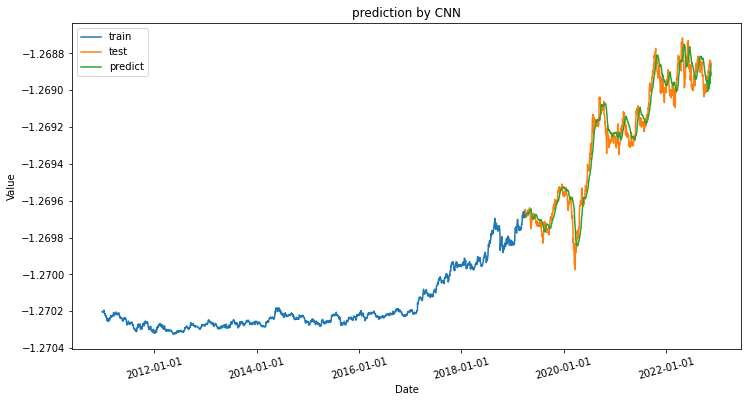

In [36]:
from matplotlib.dates import DateFormatter
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(data_main["date"][win:idx],y_train_real)
ax.plot(data_main["date"][idx:],y_test_real)
ax.plot(data_main["date"][idx:],pred_real)
myFmt = DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(myFmt)
plt.setp(ax.get_xticklabels(), rotation = 15)
plt.legend(["train","test","predict"])
plt.title("prediction by CNN")
plt.xlabel('Date', fontsize=10)
plt.ylabel('Value', fontsize=10)
plt.show()

# **GRU**

In [37]:
from keras.models import Sequential
from keras.layers import GRU
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
from tensorflow import keras


#initialisizng the model 
gru_model= Sequential()
gru_model.add(GRU(units=128,return_sequences=True,
                    input_shape=(x_train.shape[1],x_train.shape[2])))
gru_model.add(GRU(units=256))
gru_model.add(Dropout(0.3)) 
gru_model.add(Dense(units=1))

#----- compile model
opt = keras.optimizers.Adam(learning_rate=0.0001)
gru_model.compile(optimizer='adam',loss='mean_squared_error')
gru_model.summary()



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 60, 128)           50688     
                                                                 
 gru_1 (GRU)                 (None, 256)               296448    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
Total params: 347,393
Trainable params: 347,393
Non-trainable params: 0
_________________________________________________________________


In [38]:
hist_gru_model=gru_model.fit(x_train,y_train,epochs=100,
                        validation_data=(x_test,y_test)
                        ,batch_size=256)

Epoch 1/100
8/8 [==============================] - 4s 151ms/step - loss: 0.1272 - val_loss: 0.1996
Epoch 2/100
8/8 [==============================] - 0s 28ms/step - loss: 0.0325 - val_loss: 0.1459
Epoch 3/100
8/8 [==============================] - 0s 28ms/step - loss: 0.0136 - val_loss: 0.0531
Epoch 4/100
8/8 [==============================] - 0s 24ms/step - loss: 0.0075 - val_loss: 0.0146
Epoch 5/100
8/8 [==============================] - 0s 23ms/step - loss: 0.0044 - val_loss: 0.0022
Epoch 6/100
8/8 [==============================] - 0s 23ms/step - loss: 0.0033 - val_loss: 0.0035
Epoch 7/100
8/8 [==============================] - 0s 23ms/step - loss: 0.0028 - val_loss: 0.0033
Epoch 8/100
8/8 [==============================] - 0s 24ms/step - loss: 0.0024 - val_loss: 0.0021
Epoch 9/100
8/8 [==============================] - 0s 23ms/step - loss: 0.0022 - val_loss: 0.0020
Epoch 10/100
8/8 [==============================] - 0s 24ms/step - loss: 0.0021 - val_loss: 0.0019
Epoch 11/100
8/8 [

In [39]:
from sklearn import metrics
import math

y_pred=gru_model.predict(x_test)
lbl_real=y_test

mse=metrics.mean_squared_error(lbl_real, y_pred)
rmse = math.sqrt(mse)
mape=metrics.mean_absolute_percentage_error(lbl_real, y_pred)
mae=metrics.mean_absolute_error(lbl_real,y_pred)
r2= metrics.r2_score(lbl_real, y_pred)

# acc error
err = abs(y_test- y_pred)
diff = sum(err) / len(err)
accr = 100 - np.mean(diff)

result_array.append([mse,rmse,mape,mae,r2,accr])
algorithm_name.append("GRU")


29/29 [==============================] - 1s 4ms/step


In [40]:
from sklearn.preprocessing import MinMaxScaler
data_normal=data_ready.copy()
sce=MinMaxScaler(feature_range=(-1,1))
data_col=data_ready["Close"].values.reshape(-1,1)
sce.fit(data_col)
y_train_real  = sce.transform(y_train.reshape(-1,1))
y_test_real  = sce.transform(y_test.reshape(-1,1))
pred_real=sce.transform(y_pred.reshape(-1,1))

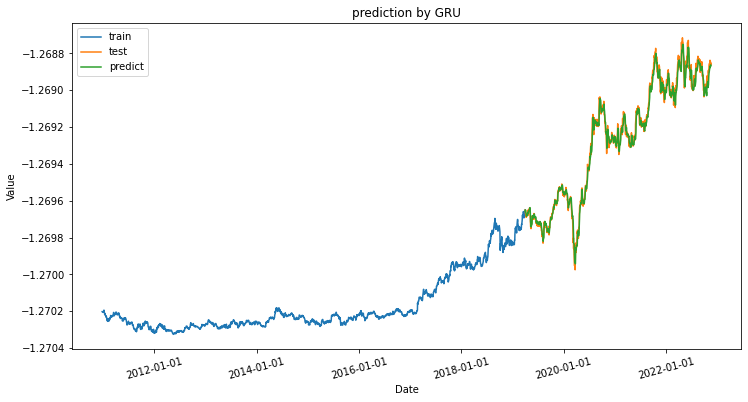

In [41]:
from matplotlib.dates import DateFormatter
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(data_main["date"][win:idx],y_train_real)
ax.plot(data_main["date"][idx:],y_test_real)
ax.plot(data_main["date"][idx:],pred_real)
myFmt = DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(myFmt)
plt.setp(ax.get_xticklabels(), rotation = 15)
plt.legend(["train","test","predict"])
plt.title("prediction by GRU")
plt.xlabel('Date', fontsize=10)
plt.ylabel('Value', fontsize=10)
plt.show()

# **result**

In [42]:
data_res=pd.DataFrame(result_array,columns=["MSE","RMSE","MAPE","MAE","R2","Accr"])
data_res["Algorithm"]=algorithm_name
data_res=data_res[["Algorithm","MSE","RMSE","MAPE","MAE","R2","Accr"]]
data_res

,Algorithm,MSE,RMSE,MAPE,MAE,R2,Accr
0,LSTM,0.003066,0.055371,0.248269,0.042015,0.980397,99.553150
1,CNN,0.008211,0.090615,0.425862,0.070961,0.947500,99.546285
2,GRU,0.001352,0.036775,0.142595,0.027415,0.991353,99.553149


In [43]:
data_res.to_excel("res_bit.xlsx")

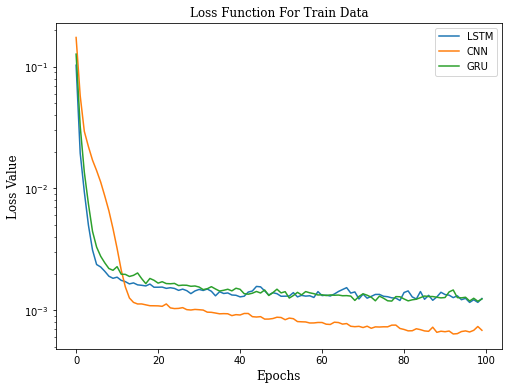

In [44]:
plt.figure(figsize=(8,6))
plt.semilogy(hist_lstm_model.history["loss"])
plt.semilogy(hist_cnn_model.history["loss"])
plt.semilogy(hist_gru_model.history["loss"])
plt.legend(algorithm_name)
plt.title('Loss Function For Train Data', fontname='serif', fontsize=12)
plt.xlabel('Epochs', fontname='serif', fontsize=12)
plt.ylabel('Loss Value', fontname='serif', fontsize=12)
plt.show()

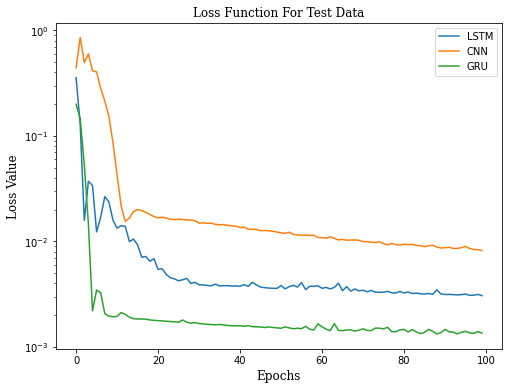

In [45]:
plt.figure(figsize=(8,6))
plt.semilogy(hist_lstm_model.history["val_loss"])
plt.semilogy(hist_cnn_model.history["val_loss"])
plt.semilogy(hist_gru_model.history["val_loss"])
plt.legend(algorithm_name)
plt.title('Loss Function For Test Data', fontname='serif', fontsize=12)
plt.xlabel('Epochs', fontname='serif', fontsize=12)
plt.ylabel('Loss Value', fontname='serif', fontsize=12)
plt.show()

# **future**

In [54]:
from sklearn.preprocessing import MinMaxScaler
data_normal=data_ready.copy()
sce=MinMaxScaler(feature_range=(-1,1))
for col_name in (data_ready.columns):
  print(col_name)
  data_col=data_ready[col_name].values.reshape(-1,1)
  data_normal[col_name]=sce.fit_transform(data_col)

Close
score


In [55]:
# gru_model
# lstm_model
# cnn_model

In [56]:
data_col=data_ready["Close"].values.reshape(-1,1)
sce.fit(data_col)

MinMaxScaler(feature_range=(-1, 1))

In [57]:
model_final=gru_model
last_time_plot=[-5,-4,-3,-2,-1]
real_lbl=y_test[last_time_plot].reshape(-1,1)
pred_lbl=model_final.predict(x_test[last_time_plot])

1/1 [==============================] - 0s 20ms/step


In [58]:
pred_price=sce.inverse_transform(pred_lbl).reshape(pred_lbl.shape[0]).tolist()
real_price=sce.inverse_transform(real_lbl).reshape(real_lbl.shape[0]).tolist()

In [62]:
import pandas as pd
data_pred=pd.DataFrame(columns=["real price","pred price"])
data_pred["real price"]=real_price
data_pred["pred price"]=pred_price
data_pred

,real price,pred price
0,2631.800049,2570.120117
1,2619.050049,2585.170166
2,2607.300049,2593.429688
3,2592.350098,2592.775635
4,2607.050049,2584.958008


In [60]:
data_hybrid=data_normal.values
last_win=data_hybrid[-win:,:]
last_win=last_win.reshape(1,last_win.shape[0],last_win.shape[1])
last_win.shape

(1, 60, 2)

In [61]:
lbl_future=model_final.predict(last_win)
lbl_future=lbl_future.reshape(-1,1)
price_future=sce.inverse_transform(lbl_future)
print(f'future price : {price_future.tolist()[0][0]}')

1/1 [==============================] - 0s 19ms/step
future price : 2584.3876953125
